<a href="https://colab.research.google.com/github/Aashish123-aikki/MachineLearning/blob/main/tensorflow_handwrittten_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from  tensorflow import keras as keras

In [ ]:
import matplotlib.pyplot as pl

In [ ]:
import numpy as np

In [ ]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

# New section

In [ ]:
len(X_test)

10000

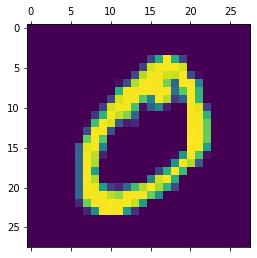

In [ ]:
pl.matshow(X_train[1])

In [ ]:
X_test=X_test /255
X_train=X_train /255

In [ ]:
y_train[1]

0

In [ ]:
x_train_flattered=X_train.reshape(len(X_train),28*28)
x_test_flattered=X_test.reshape(len(X_test),28*28)

In [ ]:
x_train_flattered[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train_flattered,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4717 - accuracy: 0.8765
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3043 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2836 - accuracy: 0.9203
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2732 - accuracy: 0.9240
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2668 - accuracy: 0.9259
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2624 - accuracy: 0.9272
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2584 - accuracy: 0.9286
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2549 - accuracy: 0.9300
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9296
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [ ]:
model.evaluate(x_test_flattered,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2682 - accuracy: 0.9259


[0.26823511719703674, 0.9258999824523926]

In [ ]:
y_predicted=model.predict(x_test_flattered)


313/313 [==============================] - 1s 1ms/step


In [ ]:
y_predicted[0]

array([3.0825771e-03, 1.4500624e-08, 1.1340330e-02, 9.7612602e-01,
       1.3596502e-03, 1.4704688e-01, 2.8929605e-08, 9.9977845e-01,
       7.4634150e-02, 6.4752215e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])


7

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
y_prediction_label=[np.argmax(i) for i in y_predicted]

In [ ]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_prediction_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    2,    0,    5,    5,    2,    1,    0],
       [   0, 1109,    3,    3,    0,    1,    3,    2,   14,    0],
       [   7,    7,  914,   27,    6,    4,   11,    7,   45,    4],
       [   2,    0,   11,  938,    1,   22,    2,    8,   18,    8],
       [   1,    1,    5,    2,  910,    0,    8,    4,    9,   42],
       [   7,    2,    3,   36,    8,  787,   10,    3,   28,    8],
       [  13,    3,    9,    2,    7,   18,  903,    1,    2,    0],
       [   1,    6,   16,   15,    8,    1,    0,  939,    3,   39],
       [   7,    6,    5,   30,    9,   34,    7,    7,  857,   12],
       [  11,    7,    1,   11,   21,    6,    0,   10,    4,  938]],
      dtype=int32)>

In [ ]:
import seaborn as s

Text(69.0, 0.5, 'actual value')

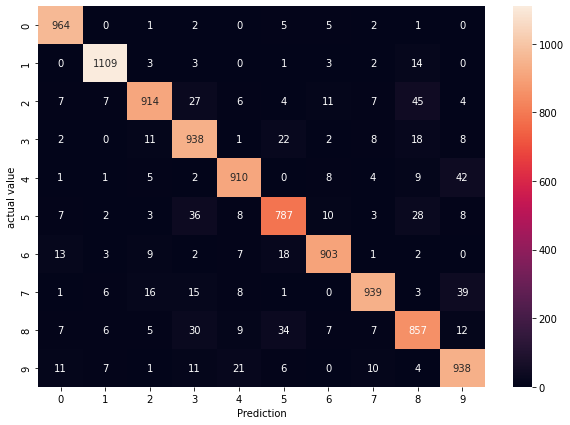

In [ ]:
pl.figure(figsize=(10,7))
s.heatmap(cm,annot=True,fmt='d')
pl.xlabel("Prediction")
pl.ylabel("actual value")

In [ ]:
model=keras.Sequential([
    keras.layers.Dense(1000, input_shape=(784,),activation='relu'),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(x_train_flattered,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1884 - accuracy: 0.9433
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0786 - accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0539 - accuracy: 0.9833
Epoch 4/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0320 - accuracy: 0.9892


In [ ]:
model.evaluate(x_test_flattered ,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.1035 - accuracy: 0.9721


[0.10353122651576996, 0.972100019454956]

In [ ]:
y_predict=model.predict(x_test_flattered)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_predict[0]

array([9.8244974e-04, 1.7920777e-01, 5.1350635e-01, 9.9370474e-01,
       2.3408249e-04, 4.7208267e-01, 3.8366097e-06, 1.0000000e+00,
       1.6139217e-01, 9.7754192e-01], dtype=float32)

In [ ]:
np.argmax(y_predict[0])

7

In [ ]:
y_predictlabel=[np.argmax(i) for i in y_predict]
cm1=tf.math.confusion_matrix(labels=y_test,predictions=y_predictlabel)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    1,    1,    0,    0,    1,    4,    1,    1,    0],
       [   0, 1110,    8,    0,    0,    1,    4,    0,   12,    0],
       [   1,    0, 1022,    1,    0,    0,    2,    3,    2,    1],
       [   0,    0,    8,  978,    0,   13,    0,    3,    4,    4],
       [   4,    1,    5,    1,  907,    1,    8,    1,    3,   51],
       [   1,    0,    0,    6,    0,  878,    5,    0,    2,    0],
       [   2,    2,    2,    0,    1,    3,  946,    0,    2,    0],
       [   2,    4,   20,    6,    1,    0,    0,  988,    2,    5],
       [   3,    1,   14,    5,    0,    1,    1,    2,  945,    2],
       [   1,    2,    2,    6,    0,    8,    0,    5,    6,  979]],
      dtype=int32)>

Text(69.0, 0.5, 'true')

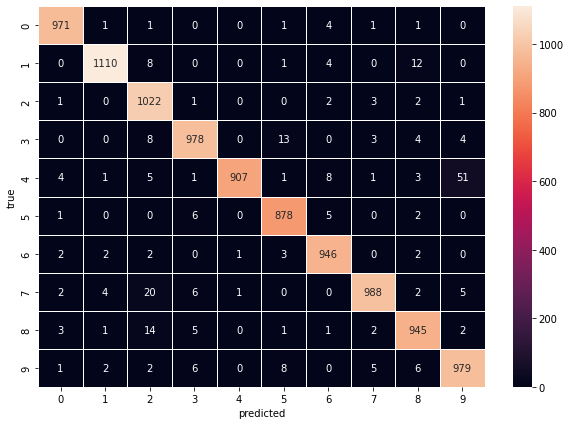

In [ ]:
pl.figure(figsize=(10,7),edgecolor='pink')
s.heatmap(cm1,annot=True,fmt='d',linewidth=1)
pl.xlabel('predicted')
pl.ylabel('true')